# Project 2 - Ames Housing Data and Kaggle Challenge

### Contents:
1. [**Modeling**](#Modeling)
 - [Linear Regressions](#Linear-Regressions)
 - [Lasso Model](#Lasso-Model)
 - [Ridge Model](#Ridge-Model)
 - [Summary of Models](#Summary-of-Models)
 - [Final Lasso Model](#Final-Lasso-Model)
 - [Interpreting Lasso Model](#Interpreting-Lasso-Model)
 - [Outside Research](#Outside-Research)
 - [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
#allow viewing of all variables in pandas
pd.set_option('max_columns', 200)

In [3]:
df_train = pd.read_csv('../datasets/train_clean.csv')

In [4]:
df_test = pd.read_csv('../datasets/test_clean.csv')

## Modeling

We will be modeling the training set through 4 different models, Linear Regression, Lasso, Ridge and ElasticNet. We then compare the 4 models and pick out the model that satisfy 2 criteria. Having a lower mean squared error while retaining a high R<sup>2</sup> score

### Linear Regressions

In [5]:
# as mentioned in the previous notebook after data clean up due to the different shape in test set and train set 
# we drop the features not in test set we also drop id and pid as they are just identifiers
features = list(set(df_train.columns).intersection(set(df_test.columns)))
features.remove('id')
features.remove('pid')

In [6]:
X = df_train[features]
y = df_train['saleprice']
X_kaggle = df_test[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# standardized the features
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_kaggle_ss = ss.transform(X_kaggle)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr.score(X_train, y_train)

0.9330307399694604

In [11]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.90392510530626

In [12]:
print("LR cross_val_score", cross_val_score(lr, X_train, y_train, cv = 5).mean())
print('LR train r2 =', lr.score(X_train, y_train))
print('LR test r2 =', lr.score(X_test, y_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
print('LR RMSE =', lr_rmse)

LR cross_val_score 0.90392510530626
LR train r2 = 0.9330307399694604
LR test r2 = 0.877760356817074
LR RMSE = 24709.786080227193


In [13]:
lr_coef = pd.DataFrame(list(zip(features, lr.coef_)))

In [14]:
lr_coef.columns = ['features', 'coefficient']

In [15]:
lr_coef.sort_values('coefficient', ascending=False)[:10]

,features,coefficient
42,ms_subclass_45,43940.990212
0,ms_zoning_i_(all),42085.623917
27,exterior_1st_cemntbd,41877.508791
175,sale_type_con,34107.207119
128,condition_2_posa,33751.146910
62,misc_feature_othr,32353.659946
19,bldg_type_2fmcon,29621.692459
45,ms_zoning_rh,28455.736925
115,exterior_2nd_vinylsd,27628.596062
112,house_style_2.5unf,27433.037809


In [16]:
lr_coef.sort_values('coefficient', ascending=False)[-10:]

,features,coefficient
49,neighborhood_collgcr,-26381.656763
111,exterior_1st_brkcomm,-26389.926503
25,exterior_2nd_cmentbd,-26428.398629
33,neighborhood_edwards,-27002.240283
46,utilities,-28198.393824
173,neighborhood_clearcr,-28391.381391
190,neighborhood_nwames,-29943.900431
91,mas_vnr_type_brkcmn,-30116.952422
51,ms_subclass_190,-34027.827595
163,garage_type_2types,-41241.929838


### Lasso Model

In [17]:
lasso = LassoCV(n_alphas = 2000, cv = 5)

In [18]:
lasso.fit(X_train_ss, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=2000, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [19]:
# Lasso metrics
print('Lasso train r2 =', lasso.score(X_train_ss, y_train))
print('Lasso test r2 =', lasso.score(X_test_ss, y_test))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_ss)))
print('Lasso RMSE =', lasso_rmse)

Lasso train r2 = 0.9280134111640562
Lasso test r2 = 0.890145436673738
Lasso RMSE = 23424.590092102437


### Ridge Model

In [20]:
ridge = RidgeCV(alphas = np.logspace(-6, 6, 200))

In [21]:
ridge.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [22]:
print('Ridge train r2 =', ridge.score(X_train_ss, y_train))
print('Ridge test r2 =', ridge.score(X_test_ss, y_test))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_ss)))
print('Ridge RMSE =', ridge_rmse)

Ridge train r2 = 0.9293569414164429
Ridge test r2 = 0.8867743347858104
Ridge RMSE = 23781.288924287717


### Summary of Models

In [23]:
print("LR cross_val_score", cross_val_score(lr, X_train, y_train, cv = 5).mean())
print('LR train r2 =', lr.score(X_train, y_train))
print('LR test r2 =', lr.score(X_test, y_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
print('LR RMSE =', lr_rmse)
print('\nLasso train r2 =', lasso.score(X_train_ss, y_train))
print('Lasso test r2 =', lasso.score(X_test_ss, y_test))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_ss)))
print('Lasso RMSE =', lasso_rmse)
print('\nRidge train r2 =', ridge.score(X_train_ss, y_train))
print('Ridge test r2 =', ridge.score(X_test_ss, y_test))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_ss)))
print('Ridge RMSE =', ridge_rmse)

LR cross_val_score 0.90392510530626
LR train r2 = 0.9330307399694604
LR test r2 = 0.877760356817074
LR RMSE = 24709.786080227193

Lasso train r2 = 0.9280134111640562
Lasso test r2 = 0.890145436673738
Lasso RMSE = 23424.590092102437

Ridge train r2 = 0.9293569414164429
Ridge test r2 = 0.8867743347858104
Ridge RMSE = 23781.288924287717


Looking at the RMSE score, we will pick Lasso model as it has the lowers MSE score along with the highest R<sup>2</sup> test score

### Final Lasso Model

This time round we will fit the entire training set into our final model which is only for kaggle specifically

In [24]:
X_ss = ss.fit_transform(X)

In [25]:
lasso_final = lasso.fit(X_ss, y)

In [26]:
pred = lasso.predict(X_kaggle_ss)

In [27]:
df_lasso_kaggle = pd.DataFrame(df_test, columns = ['id'])

In [28]:
df_lasso_kaggle['saleprice'] = pred


In [29]:
df_lasso_kaggle.head()

,id,saleprice
0,2658,138687.318309
1,2718,157401.772411
2,2414,221618.101842
3,1989,111022.716913
4,625,177024.637440


In [30]:
df_lasso_kaggle.to_csv('../datasets/kaggle_submission_3.csv', index = False)

### Interpreting Lasso Model

We will be reviewing the train, test split model of lasso as we do not have the kaggle test set actual sale price

In [31]:
lasso.intercept_

181479.01805758907

The intercept value is 181479 (rounded), which means that if all features in the model is reduce to zero, the home would cost about 181579 dollars. This is reasonable given the fact that if barebones features were available the plot of land would still be valuable

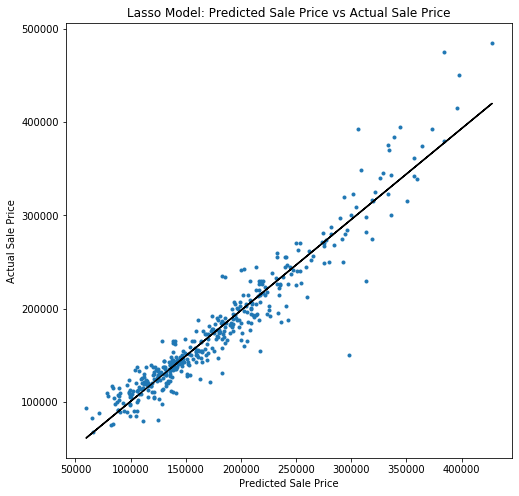

In [32]:
plt.figure(figsize = (8,8))
m, b = np.polyfit(x = lasso.predict(X_test_ss), y = y_test, deg = 1)
plt.plot(lasso.predict(X_test_ss), y_test, '.')
plt.plot(lasso.predict(X_test_ss), b + m * lasso.predict(X_test_ss), '-', color = 'k')
frame1 = plt.gca()
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Lasso Model: Predicted Sale Price vs Actual Sale Price');

In [33]:
predict = lasso.predict(X_test_ss)
residuals = y_test - predict

In [ ]:
plt.hist(residuals)
plt.title('Distribution of Residuals');

Here we can see that the residuals are normally distributed and centered around zero which means our model is accurate.

In [ ]:
lasso.score(X_test_ss, y_test)

In [ ]:
coef_df = pd.DataFrame([lasso.coef_, X.columns], index = ['coefficients', 'features']).T
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values(by='coefficients',ascending=False)
coef_df.head(20)

In [ ]:
coef_df.tail(20)

In [ ]:
plt.figure(figsize = (14, 10))
plt.barh(y=coef_df.index[:20], width=coef_df['coefficients'][0:20]);
plt.title('Positive Contributing Features')
plt.xlabel('Coefficient');

In [ ]:
plt.figure(figsize = (14, 10))
plt.barh(y=coef_df.index[-20:], width=coef_df['coefficients'][-20:]);
plt.title('Negative Contributing Features')
plt.xlabel('Coefficient');

From the coefficient table we can sparse out that ground living area and overall quality still remains highly correlated to saleprice and this is expected as was discovered in our EDA, the top coefficient features are also group by quality, condition, housing area and neighborhood feature. One particular area we would like to zoom in on is the appearance of 3 distinct neighborhood; Northridge Heights, StoneBrook and Northridge. 

### Outside Research

<img src="../images/top_3_ames_neighborhood.png" />  
[Image Source](https://www.google.com/maps/place/Northridge+Heights+Park/@42.055346,-93.6475705,15.75z/data=!4m5!3m4!1s0x87ee70d870002e1d:0xb084c9e6100e56f2!8m2!3d42.0597732!4d-93.6494713)

Using Google maps, we can see that the top 3 neighborhood as seen from the positive cotributing features histogram are circled in orange. This means that it is likely that these three neighborhood are situated in the part of the city is likely part of the wealthier population. This is further support with external source saying that overall, the expenses in Northridge Heights are 2% higher than National Average and that most people in the neighborhood own their home with 83% of the households being occupied by owners [Source](https://www.addressreport.com/report/neighborhood/ames-ia/northridge-heights-ames-ia/?display=true).


<img src="../images/housing_quality.png" />  
[Image Source](https://www.google.com/maps/place/Northridge+Heights+Park/@42.0592842,-93.6495254,3a,75y,214.69h,82.19t/data=!3m6!1e1!3m4!1s5f9pVAST0RW9Mg4IMw0M8A!2e0!7i16384!8i8192!4m5!3m4!1s0x87ee70d870002e1d:0xb084c9e6100e56f2!8m2!3d42.0597732!4d-93.6494713)

As mentioned earlier, the top coefficient features are group by quality, condition, housing area and neighborhood. From this picture we can see that house along Northridge Heights have good exterior quality and look to be in good condition as well which further supports the fact that house quality and condition is an important factor for sales prices. 

Some additional features that can likely be included in future models would be crime rate, home ownership (renters or owners) and demographics of the neighborhood in questions. Lower crime rate is likely to affect sales price as well evidence by the fact that Northridge Heights has crime rate that is 53% lower than National average [Source](https://www.addressreport.com/report/neighborhood/ames-ia/northridge-heights-ames-ia/?display=true). 

### Conclusions and Recommendations

**Top 10 Feature Correlation**
1. Overall Quality 				(0.80)
2. Exterior Quality				(0.72)
3. Above-Grade Living Area  	(0.72)
4. Kitchen Quality				(0.69)
5. Total Basement Square Ft		(0.67)
6. Garage Area					(0.66)
7. Garage Cars Capacity 		(0.65)
8. First Floor Square Ft		(0.65)
9. Basement Quality				(0.61)
10. Year Built			        (0.57)

**Final Model Details**
 - Regularization: Lasso
 - Scaling: Standard Scalar
 - Cross-Validation R<sup>2</sup> Score: 0.9258
 - R<sup>2</sup> Score on Test Prediction: 0.9021
 - RSME: 24203.23

After going through Linear Regularization, Lasso Regression and Ridge Regressions. The lasso model was eventually chosen due to lower root mean square error as well as higher R<sup>2</sup> score on the test prediction.

**Top 10 Model Coefficients**
1. Above Grade Living Area (24832.4)
2. Overall Quality (12109.9)
3. Type 1 Basement Area (9263.1)
4. Year Built (7888.58)
5. Northridge Heights Neighborhood (7302.22)
6. Total Basement Area (6556.78)
7. Masonry Veneer Area (5861.95)
8. Stonebrook Neighborhood (5698.48)
9. Exertnal Quality (5374.09)
10. Overall Condition (4879.82)

We can see that the major contributing features will be Area followed by quality of the house in question and next will be the neighborhood. The grouping of these factors are the minimum require to produce a model which is capable of doing a prediction that is fairly accurate.

**Recommendations**

For Homeowners who are looking to sell some areas of improvement that they can focus on are the quality/condition of the home before sales they can attempt to artitrage the remodel to increase in sales difference to sell the house for a higher profit.

This model serves as a starting point to model similar cities. It also gives us a close look into the groups of factors that we likely would like to take note if we were to generate a new model for another cities. Additional research should also be done into how to more accurate quantify material categories. Additional features can also be include like crime rate, type of ownership (renters or owners) and more demographics of the neighbhorhood in general.